In [3]:
from experiments.regression_0.analysis import Reader
from ga_regression import *
from matplotlib import pyplot as plt

C:\Users\dg\.conda\envs\diffnet4\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
# folder = r"D:\resynth\run_51_52\1k_faces\2025-07-02-11-02-11"  # okish
folder = r"D:\resynth\run_48_49\1k_faces\2025-07-03-07-07-51"  # ok
# folder = r"D:\resynth\run_09_10\1k_faces\2025-07-03-12-18-20"  # not great
# folder = r"D:\resynth\run_42_43\1k_faces\2025-06-26-14-39-11"  # ok ish
# folder = r"D:\resynth\run_38_39\1k_faces\2025-07-07-07-22-21"  # ok ish

folder = r"D:\resynth\run_48_49\resynth_everything3\2025-07-10-21-40-08"

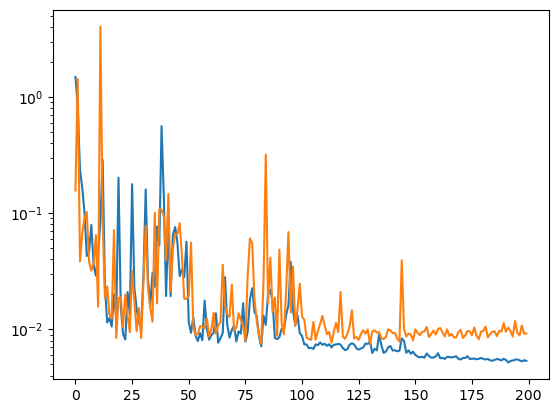

In [5]:
folder = Path(folder)
r = Reader(folder)
meta = r.metadata()
opts = meta['opts']
epoch, ltest = r.scalar('loss/test')
epoch, ltrain = r.scalar('loss/train')
plt.plot(epoch, ltrain, epoch, ltest)
plt.yscale('log')

In [6]:
scatter_plot_file = opts.metadata_file.with_stem(opts.metadata_file.stem.replace('metadata', 'scatterplot'))

if scatter_plot_file.exists():
    scatterdata = torch.load(scatter_plot_file)
else:
    train_test_scenes = (meta['train_scenes'], meta['test_scenes'])
    train_dataset, test_dataset = opts.load_datasets(precalc_ops=True, train_test_scenes=train_test_scenes)
    expt = opts.experiment(train_dataset=train_dataset, test_dataset=test_dataset)
    expt.model.load_state_dict(torch.load(opts.model_file))
    
    train_loader = DataLoader(expt.train_dataset, batch_size=None, shuffle=True)
    test_loader = DataLoader(expt.test_dataset, batch_size=None)
    
    obs_train, preds_train = expt.predict(train_loader)
    obs_test, preds_test = expt.predict(test_loader)
    scatterdata = dict(obs_train=obs_train, preds_train=preds_train, obs_test=obs_test, preds_test=preds_test)
    torch.save(scatterdata, scatter_plot_file)

Pre-calculating operators


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 41.97it/s]


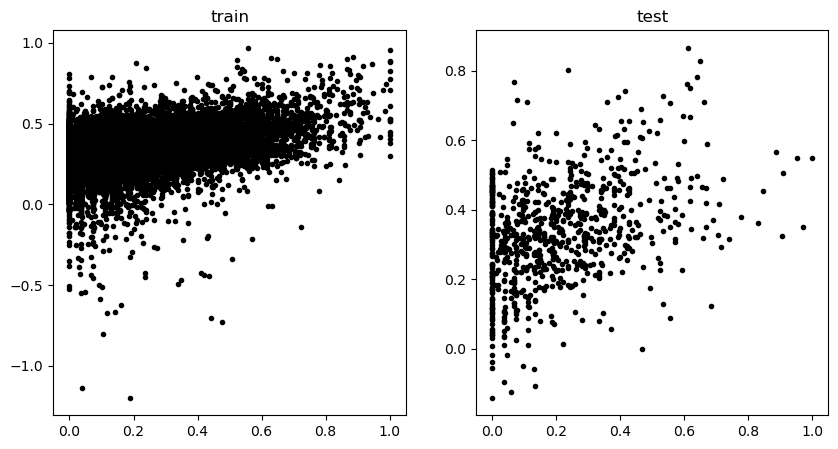

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(scatterdata['obs_train'], scatterdata['preds_train'], 'k.')
axs[1].plot(scatterdata['obs_test'], scatterdata['preds_test'], 'k.')
axs[0].set_title('train')
_ = axs[1].set_title('test')